In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Monte Carlo Sampling for Approximate Inference

In many probabilistic models, exact inference is computationally intractable, so we rely on approximation methods. One such method is **Monte Carlo sampling**, where we approximate expectations over a probability distribution by drawing samples from it.

### Problem Setup

We wish to evaluate the expectation of a function $ f(z) $ with respect to a probability distribution $ p(z) $. The variables $ z $ could be continuous, discrete, or a combination of both.

For continuous variables, the expectation can be written as:

$$
E[f] = \int f(z) p(z) dz
$$

For discrete variables, this integral is replaced by a summation.

To approximate this expectation using Monte Carlo sampling, we draw independent samples $ z^{(l)} $ (where $ l = 1, 2, \dots, L $) from the distribution $ p(z) $. The expectation can then be approximated by:

$$
\hat{f} = \frac{1}{L} \sum_{l=1}^{L} f(z^{(l)})
$$

As long as the samples are drawn from $ p(z) $, this estimator $ \hat{f} $ will have the correct mean.

### Variance of the Estimator

The variance of the estimator is given by:

$$
\text{var}[\hat{f}] = \frac{1}{L} \mathbb{E}\left[(f - \mathbb{E}[f])^2\right]
$$

where $ \mathbb{E}[f] $ is the true expectation. The variance measures how much the function $ f(z) $ varies under the distribution $ p(z) $. The accuracy of the estimate depends on the number of samples $ L $, as well as the nature of the function $ f(z) $ and the distribution $ p(z) $.

### Sampling Methods

For models with a joint distribution $ p(z) $, we can sample from the joint distribution using an **ancestral sampling approach**. This method involves sampling from the conditional distributions of each variable given its parents, which can be done in a sequence.

The joint distribution $ p(z) $ can be written as:

$$
p(z) = \prod_{i=1}^{M} p(z_i | \text{pai})
$$

where $ z_i $ is the set of variables associated with node $ i $, and $ \text{pai} $ represents the set of parent variables of $ z_i $.

### Markov Chain Monte Carlo (MCMC)

In the case of more complex distributions, especially for undirected graphical models, **MCMC methods** like **Gibbs sampling** are used. These methods allow us to sample from the joint distribution, even in cases where direct sampling is difficult.

### Importance of the Posterior Distribution

In many cases, the goal is to sample from the **posterior distribution** $ p(z | \text{data}) $. If some of the nodes in the model are observed, we need to sample from the posterior distribution conditioned on these observed values. This can be done by discarding samples that do not agree with the observed data.

The logic sampling approach works by:

1. Sampling a value for each variable  $z_i $ from its conditional distribution.
2. Checking if the sampled value matches the observed value.
3. If it matches, keep the sample; if not, discard the sample and start over.

However, this approach is inefficient when there are many observed variables or many states for each variable, which is why other MCMC methods are preferred in practice.

### Summary

Monte Carlo methods provide a general framework for approximating expectations in complex probabilistic models. The efficiency of these methods depends on the quality of the samples and the dimensionality of the problem. For large problems, more sophisticated techniques such as **Gibbs sampling** and **importance sampling** are often employed.

### References




Estimated Expectation: 1.057149074643423


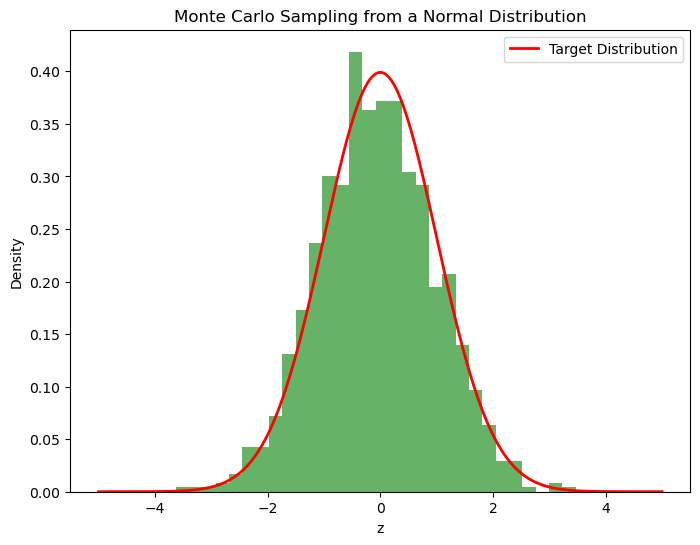

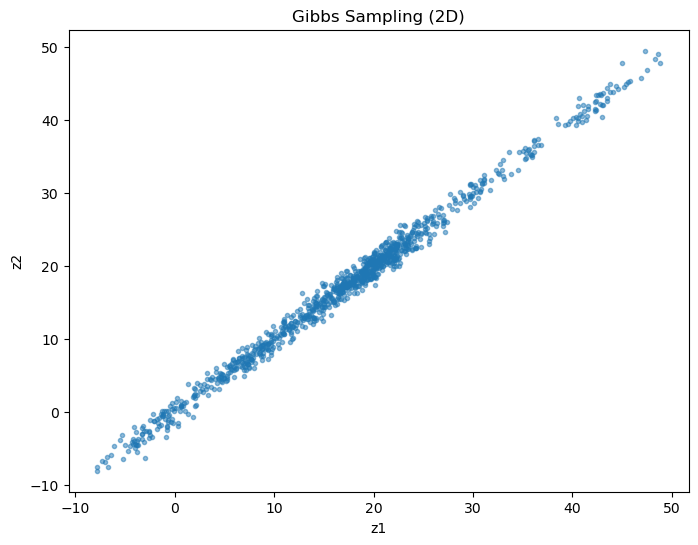

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution p(z) - for simplicity, let's use a normal distribution for this example.
def target_distribution(z):
    # Normal distribution with mean 0 and variance 1
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

# Monte Carlo sampling function
def monte_carlo_sampling(target_dist, num_samples=1000):
    # Draw random samples from a normal distribution (or any distribution you can sample from directly)
    samples = np.random.normal(0, 1, num_samples)
    
    # Approximate expectation of a function f(z) (e.g., f(z) = z^2 for simplicity)
    f_samples = samples**2  # Here, we take the square of the samples as the function
    estimated_expectation = np.mean(f_samples)
    
    return samples, estimated_expectation

# Gibbs Sampling function
def gibbs_sampling(num_iterations=1000):
    # Initial values for the variables
    z1 = np.random.normal(0, 1)  # Sample from the normal distribution for z1
    z2 = np.random.normal(0, 1)  # Sample from the normal distribution for z2
    
    samples = []
    
    for _ in range(num_iterations):
        # Sample from the conditional distribution p(z1 | z2)
        z1 = np.random.normal(z2, 1)
        
        # Sample from the conditional distribution p(z2 | z1)
        z2 = np.random.normal(z1, 1)
        
        # Store the sample pair (z1, z2)
        samples.append((z1, z2))
    
    return np.array(samples)

# Run Monte Carlo sampling
samples, estimated_expectation = monte_carlo_sampling(target_distribution, num_samples=1000)
print(f"Estimated Expectation: {estimated_expectation}")

# Plot the samples from the target distribution
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
z = np.linspace(-5, 5, 1000)
plt.plot(z, target_distribution(z), label="Target Distribution", color='r', lw=2)
plt.title("Monte Carlo Sampling from a Normal Distribution")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.show()

# Run Gibbs sampling
gibbs_samples = gibbs_sampling(num_iterations=1000)

# Plot Gibbs samples
plt.figure(figsize=(8, 6))
plt.plot(gibbs_samples[:, 0], gibbs_samples[:, 1], '.', alpha=0.5)
plt.title("Gibbs Sampling (2D)")
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()



Estimated Expectation: 1.0388076904389256


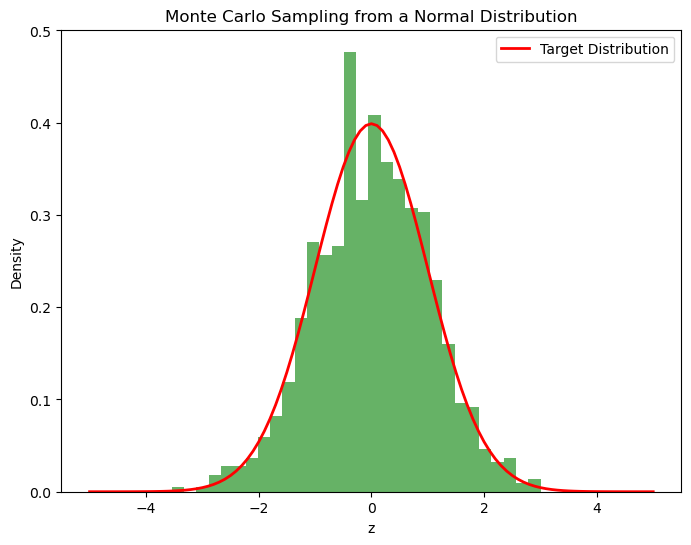

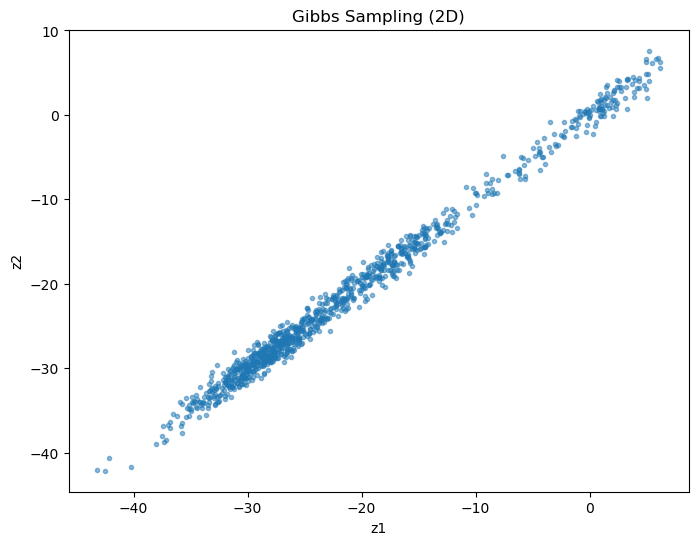

In [2]:
import random
import math
import matplotlib.pyplot as plt

# Define the target distribution p(z) - for simplicity, let's use a normal distribution for this example.
def target_distribution(z):
    # Normal distribution with mean 0 and variance 1 (using the probability density function)
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * z**2)

# Monte Carlo sampling function
def monte_carlo_sampling(target_dist, num_samples=1000):
    samples = []
    f_samples = []
    
    # Generate samples from a normal distribution (using Box-Muller method)
    for _ in range(num_samples):
        u1 = random.random()
        u2 = random.random()
        z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(z)
        f_samples.append(z**2)  # Assume f(z) = z^2 for simplicity
    
    # Estimate the expectation
    estimated_expectation = sum(f_samples) / num_samples
    return samples, estimated_expectation

# Gibbs Sampling function
def gibbs_sampling(num_iterations=1000):
    # Initial values for the variables
    z1 = random.gauss(0, 1)  # Sample from the normal distribution for z1
    z2 = random.gauss(0, 1)  # Sample from the normal distribution for z2
    
    samples = []
    
    for _ in range(num_iterations):
        # Sample from the conditional distribution p(z1 | z2)
        z1 = random.gauss(z2, 1)
        
        # Sample from the conditional distribution p(z2 | z1)
        z2 = random.gauss(z1, 1)
        
        # Store the sample pair (z1, z2)
        samples.append((z1, z2))
    
    return samples

# Run Monte Carlo sampling
samples, estimated_expectation = monte_carlo_sampling(target_distribution, num_samples=1000)
print(f"Estimated Expectation: {estimated_expectation}")

# Plot the samples from the target distribution
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')
z = [i * 0.1 for i in range(-50, 51)]  # Range for plotting
target_vals = [target_distribution(val) for val in z]
plt.plot(z, target_vals, label="Target Distribution", color='r', lw=2)
plt.title("Monte Carlo Sampling from a Normal Distribution")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.show()

# Run Gibbs sampling
gibbs_samples = gibbs_sampling(num_iterations=1000)

# Plot Gibbs samples
plt.figure(figsize=(8, 6))
x_vals = [sample[0] for sample in gibbs_samples]
y_vals = [sample[1] for sample in gibbs_samples]
plt.plot(x_vals, y_vals, '.', alpha=0.5)
plt.title("Gibbs Sampling (2D)")
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()


## Basic Sampling Algorithms

In this section, we consider some simple strategies for generating random samples from a given distribution. Since the samples will be generated by a computer algorithm, they will be **pseudo-random numbers**, i.e., they are deterministically calculated, but must pass appropriate tests for randomness. Generating such numbers raises several subtleties (Press et al., 1992) that lie outside the scope of this book. Here we shall assume that an algorithm has been provided that generates pseudo-random numbers distributed uniformly over $ (0, 1) $, and indeed most software environments have such a facility built in.

## Standard Distributions

We first consider how to generate random numbers from simple nonuniform distributions, assuming that we already have available a source of uniformly distributed random numbers. Suppose that $ z $ is uniformly distributed over the interval $ (0, 1) $, and that we transform the values of $ z $ using some function $ f(\cdot) $ so that $ y = f(z) $. The distribution of $ y $ will be governed by:

$$ p(y) = p(z) \frac{dz}{dy} $$

where, in this case, $ p(z) = 1 $. Our goal is to choose the function $ f(z) $ such that the resulting values of $ y $ have some specific desired distribution $ p(y) $. 

Integrating the equation:

$$ \int_{-\infty}^{y} p(y) \, dy = h(y) $$

Thus, $ y = h^{-1}(z) $, and we have to transform the uniformly distributed random numbers using a function which is the inverse of the indefinite integral of the desired distribution.

### Example 1: Exponential Distribution

Consider the exponential distribution:

$$ p(y) = \lambda \exp(-\lambda y), \quad 0 \leq y < \infty $$

In this case, the lower limit of the integral is 0, and so:

$$ h(y) = 1 - \exp(-\lambda y) $$

Thus, if we transform our uniformly distributed variable $ z $ using:

$$ y = -\frac{1}{\lambda} \ln(1 - z) $$

then $ y $ will have an exponential distribution.

### Example 2: Cauchy Distribution

Another example of a distribution to which the transformation method can be applied is the **Cauchy distribution**:

$$ p(y) = \frac{1}{\pi (1 + y^2)} $$

In this case, the inverse of the indefinite integral can be expressed in terms of the tangent function.

### Transformation to Multiple Variables

The generalization to multiple variables is straightforward and involves the Jacobian of the change of variables:

$$ p(y_1, \ldots, y_M) = p(z_1, \ldots, z_M) \left| \frac{\partial(z_1, \ldots, z_M)}{\partial(y_1, \ldots, y_M)} \right| $$

### Example 3: Box-Muller Method for Gaussian Distribution

As a final example of the transformation method, we consider the **Box-Muller method** for generating samples from a Gaussian distribution. 

First, suppose we generate pairs of uniformly distributed random numbers $ z_1, z_2 \in (-1, 1) $, which we can do by transforming a variable distributed uniformly over $ (0, 1) $ using:

$$ z \rightarrow 2z - 1 $$

Next, we discard each pair unless it satisfies:

$$ z_1^2 + z_2^2 \leq 1 $$

This leads to a uniform distribution of points inside the unit circle with:

$$ p(z_1, z_2) = \frac{1}{\pi} $$

as illustrated in Figure 11.3. Then, for each pair $ z_1, z_2 $, we evaluate the quantities:

$$ r = \sqrt{-2 \ln(z_1^2 + z_2^2)} $$

$$ \theta = 2\pi z_2 $$

Finally, we transform $ r $ and $ \theta $ into Gaussian-distributed samples:

$$ x = r \cos(\theta) $$

$$ y = r \sin(\theta) $$

This gives us two independent samples from the standard normal distribution.

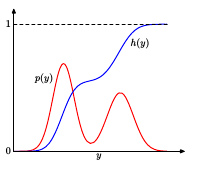

Fig.2 Geometrical interpretation of the trans- formation method for generating nonuniformly distributed random numbers. h(y) is the indeﬁnite integral of the desired dis- tribution p(y). If a uniformly distributed random variable z is transformed using y = h−1 (z), then y will be distributed ac- cording to p(y).

### Geometrical Interpretation

The Box-Muller method generates samples by first generating random points within a unit circle, and then transforming these points using polar coordinates. This method illustrates how geometric transformations can be used to generate samples from complex distributions.

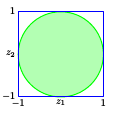

Fig.3 The Box-Muller method for generating Gaussian dis- tributed random numbers starts by generating samples from a uniform distribution inside the unit circle.
---

This concludes the basic idea of using transformations to generate random samples from various distributions. The next steps involve sampling from more complex distributions and applying these methods in a broader context.


## Generating Gaussian and Multivariate Gaussian Random Variables

### Box-Muller Method for Standard Gaussian Distribution

To generate independent Gaussian random variables $ y_1 $ and $ y_2 $ with zero mean and unit variance, we use the **Box-Muller transformation**. Given two uniform random variables $ z_1, z_2 $ in $ (0, 1) $, we compute:

$$
y_1 = \sqrt{-2 \ln z_1} \cos(2\pi z_2)
$$

$$
y_2 = \sqrt{-2 \ln z_1} \sin(2\pi z_2)
$$

Here $ z_1 $ and $ z_2 $ are generated as independent uniform random samples in the interval $ (0, 1) $.

The joint distribution of $ y_1 $ and $ y_2 $ is derived as follows. First, let:

$$
r^2 = z_1^2 + z_2^2
$$

The distribution of $ y_1 $ and $ y_2 $ becomes:

$$
p(y_1, y_2) = p(z_1, z_2) \left| \frac{\partial(z_1, z_2)}{\partial(y_1, y_2)} \right|
$$

Using the Jacobian transformation, we find:

$$
p(y_1, y_2) = \frac{1}{\sqrt{2\pi}} e^{-y_1^2 / 2} \cdot \frac{1}{\sqrt{2\pi}} e^{-y_2^2 / 2}
$$

Thus, $ y_1 $ and $ y_2 $ are independent, each following a Gaussian distribution with zero mean and unit variance.

## Generalization to Multivariate Gaussian Distribution

If $ y $ has a Gaussian distribution with zero mean and unit variance, then a linear transformation:

$$
\sigma y + \mu
$$

will have a Gaussian distribution with mean $ \mu $ and variance $ \sigma^2 $.

To generate random variables with a **multivariate Gaussian distribution** having mean vector $ \mu $ and covariance matrix $ \Sigma $, we use the **Cholesky decomposition**. The covariance matrix $ \Sigma $ is decomposed as:

$$
\Sigma = L L^T
$$

where $ L $ is a lower triangular matrix. Given a vector $ z $ of independent standard Gaussian variables (mean 0, variance 1), we compute:

$$
y = \mu + Lz
$$

This ensures that $ y $ has the desired mean $ \mu $ and covariance $ \Sigma $.

## Limitations of Transformation Methods

The success of the transformation method depends on the ability to calculate and invert the indefinite integral of the desired distribution. While this is feasible for a limited set of simple distributions, for more complex cases we must use alternative methods like **rejection sampling** and **importance sampling**.

---

Next, we will explore these alternative techniques to address more general problems in sampling from complex probability distributions.


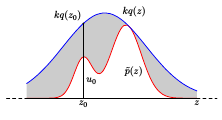

Fig.4 In the rejection sampling method, samples are drawn from a simple distribution q(z) and rejected if they fall in the grey area between the unnormalized distribution e p(z) and the scaled distribu- tion kq(z). The resulting samples are distributed according to p(z), which is the normalized version of e p(z).


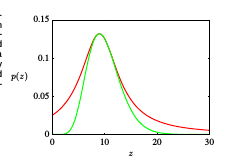

Fig.5 Plot showing the gamma distribution given by (11.15) as the green curve, with a scaled Cauchy pro- posal distribution shown by the red curve. Samples from the gamma distribution can be obtained by sampling from the Cauchy and then applying the rejection sampling criterion.

## Rejection Sampling

$$
\textbf{Rejection sampling} \text{ is a method to sample from complex distributions } p(z), \text{ using a simpler proposal distribution } q(z).
$$

---

### Problem Setup

$$
\text{We aim to sample from a distribution } p(z), \text{ where:}
$$
1. $ p(z) $ is difficult to sample directly.
2. We can compute an unnormalized version $ \tilde{p}(z) $, where:
   $$
   p(z) = \frac{\tilde{p}(z)}{Z_p},
   $$
   and $ Z_p $ (normalization constant) is unknown.

---

### Algorithm

1. **Define a comparison function**:
   $$
   kq(z) \geq \tilde{p}(z) \quad \forall z.
   $$

2. **Sampling steps**:
   - Draw $ z_0 \sim q(z) $ (from the proposal distribution).
   - Draw $ u_0 \sim \text{Uniform}(0, kq(z_0)) $.
   - **Accept** $ z_0 $ if:
     $$
     u_0 \leq \tilde{p}(z_0).
     $$
   - Otherwise, **reject** $ z_0 $ and repeat.

3. **Result**: Accepted samples $ z_0 $ follow $ p(z) $.

---

### Acceptance Probability

The probability of accepting a sample is:
$$
P(\text{accept}) = \int \frac{\tilde{p}(z)}{kq(z)} q(z) \, dz = \frac{1}{k} \int \tilde{p}(z) \, dz = \frac{1}{k}.
$$

To maximize efficiency, choose $ k $ as small as possible, subject to:
$$
kq(z) \geq \tilde{p}(z).
$$

---

### Example: Sampling from a Gamma Distribution

The Gamma distribution is defined as:
$$
\text{Gam}(z \mid a, b) = \frac{b^a z^{a-1} e^{-bz}}{\Gamma(a)},
$$
where $ a > 1 $, $ b > 0 $, and $ z \geq 0 $.

#### Proposal Distribution

Use a generalized **Cauchy distribution** as the proposal:
$$
q(z) = \frac{k}{1 + \frac{(z - c)^2}{b^2}},
$$
where:
- $ c = a - 1 $,
- $ b^2 = 2a - 1 $,
- $ k $ is chosen such that $ kq(z) \geq \tilde{p}(z) $.

This choice minimizes rejection rates.

---

### Visualization

Gamma distribution $ \text{Gam}(z) $ (green curve) and scaled proposal $ kq(z) $ (red curve):

$$
\text{Insert visualization here if available.}
$$


In [3]:
import random
import math

def gamma_distribution(z, a, b):
    """
    Compute the (unnormalized) Gamma distribution value for z.
    """
    if z < 0:
        return 0
    return (b**a) * (z**(a - 1)) * math.exp(-b * z)

def generalized_cauchy_distribution(z, k, c, b):
    """
    Compute the generalized Cauchy proposal distribution value for z.
    """
    return k / (1 + ((z - c)**2) / (b**2))

def rejection_sampling(gamma_params, cauchy_params, k, num_samples):
    """
    Perform rejection sampling to draw samples from the Gamma distribution.
    
    Args:
        gamma_params: Tuple (a, b) for the Gamma distribution parameters.
        cauchy_params: Tuple (c, b) for the Cauchy distribution parameters.
        k: Scaling constant for the proposal distribution.
        num_samples: Number of samples to generate.
    
    Returns:
        List of accepted samples from the target distribution.
    """
    a, b = gamma_params
    c, b_cauchy = cauchy_params
    samples = []
    
    while len(samples) < num_samples:
        # Sample z0 from the Cauchy distribution
        z0 = c + b_cauchy * math.tan(random.uniform(-math.pi / 2, math.pi / 2))
        
        # Compute the values for the rejection criterion
        p_z0 = gamma_distribution(z0, a, b)
        q_z0 = generalized_cauchy_distribution(z0, k, c, b_cauchy)
        
        # Generate a uniform random number for the acceptance step
        u0 = random.uniform(0, k * q_z0)
        
        # Accept the sample if u0 <= p(z0)
        if u0 <= p_z0:
            samples.append(z0)
    
    return samples

# Example Usage
if __name__ == "__main__":
    # Gamma distribution parameters
    a, b = 3.0, 2.0
    
    # Proposal distribution parameters
    c, b_cauchy = a - 1, math.sqrt(2 * a - 1)
    k = 2.0  # Scaling constant (must satisfy kq(z) >= p(z) for all z)
    
    # Generate samples
    num_samples = 1000
    samples = rejection_sampling((a, b), (c, b_cauchy), k, num_samples)
    
    # Print first few samples
    print("First 10 samples:", samples[:10])


First 10 samples: [1.206579162131042, 1.2799710115714993, 1.636390922680806, 0.5592701378607436, 1.7037207037278637, 0.4886771804972685, 0.6889394023735964, 1.3210380862537483, 2.085084590484586, 1.651563967791968]


In [4]:
import random
import math

def gamma_distribution(z, a, b):
    """
    Compute the (unnormalized) Gamma distribution value for z.
    """
    if z < 0:
        return 0
    return (b**a) * (z**(a - 1)) * math.exp(-b * z)

def generalized_cauchy_distribution(z, k, c, b):
    """
    Compute the generalized Cauchy proposal distribution value for z.
    """
    return k / (1 + ((z - c)**2) / (b**2))

def rejection_sampling(gamma_params, cauchy_params, k, num_samples):
    """
    Perform rejection sampling to draw samples from the Gamma distribution.
    
    Args:
        gamma_params: Tuple (a, b) for the Gamma distribution parameters.
        cauchy_params: Tuple (c, b) for the Cauchy distribution parameters.
        k: Scaling constant for the proposal distribution.
        num_samples: Number of samples to generate.
    
    Returns:
        List of accepted samples from the target distribution.
    """
    a, b = gamma_params
    c, b_cauchy = cauchy_params
    samples = []
    
    while len(samples) < num_samples:
        # Sample z0 from the Cauchy distribution
        z0 = c + b_cauchy * math.tan(random.uniform(-math.pi / 2, math.pi / 2))
        
        # Compute the values for the rejection criterion
        p_z0 = gamma_distribution(z0, a, b)
        q_z0 = generalized_cauchy_distribution(z0, k, c, b_cauchy)
        
        # Generate a uniform random number for the acceptance step
        u0 = random.uniform(0, k * q_z0)
        
        # Accept the sample if u0 <= p(z0)
        if u0 <= p_z0:
            samples.append(z0)
    
    return samples

# Example Usage
if __name__ == "__main__":
    # Gamma distribution parameters
    a, b = 3.0, 2.0
    
    # Proposal distribution parameters
    c, b_cauchy = a - 1, math.sqrt(2 * a - 1)
    k = 2.0  # Scaling constant (must satisfy kq(z) >= p(z) for all z)
    
    # Generate samples
    num_samples = 1000
    samples = rejection_sampling((a, b), (c, b_cauchy), k, num_samples)
    
    # Print first few samples
    print("First 10 samples:", samples[:10])


First 10 samples: [0.5705683532017563, 0.7311384662584217, 2.7683300367262875, 1.5354833055383583, 0.5262010493121423, 2.9091440355932656, 1.1660066684024406, 2.8179327432405046, 1.2706405114035944, 1.2886865547784416]


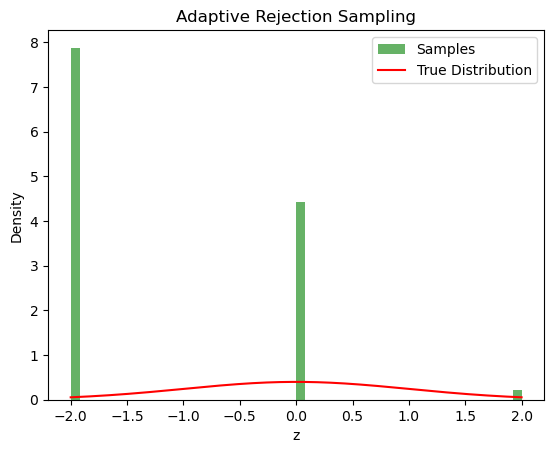

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

def log_gaussian(z, mean=0, variance=1):
    """Log of the Gaussian distribution."""
    return -0.5 * ((z - mean)**2 / variance) - 0.5 * math.log(2 * math.pi * variance)

def gaussian(z, mean=0, variance=1):
    """Gaussian distribution."""
    return math.exp(log_gaussian(z, mean, variance))

def tangent_line(z, x, slope, intercept):
    """Tangent line function for the envelope."""
    return slope * (z - x) + intercept

def envelope_function(z, tangents, grid_points):
    """Compute the envelope function as a piecewise exponential."""
    exp_values = []
    for i in range(len(grid_points) - 1):
        slope, intercept = tangents[i]
        mask = (z >= grid_points[i]) & (z < grid_points[i + 1])
        exp_values.append(mask * math.exp(intercept) * math.exp(slope * (z - grid_points[i])))
    return np.sum(exp_values, axis=0)

def adaptive_rejection_sampling(log_target, grid_points, num_samples):
    """
    Adaptive rejection sampling implementation for log-concave functions.

    Args:
        log_target: Function to compute the log of the target distribution.
        grid_points: Initial grid points for the envelope construction.
        num_samples: Number of samples to draw.

    Returns:
        List of accepted samples.
    """
    samples = []
    tangents = []

    # Compute initial tangents at grid points
    for x in grid_points:
        slope = derivative(log_target, x)
        intercept = log_target(x) - slope * x
        tangents.append((slope, intercept))

    while len(samples) < num_samples:
        # Sample from the envelope function
        z = np.random.choice(grid_points)  # Simplified for illustration
        
        # Compute q(z) using the envelope function
        q_z = envelope_function(z, tangents, grid_points)

        # Sample a uniform value to check acceptance
        u = np.random.uniform(0, q_z)
        
        # Evaluate the log target and envelope at z
        log_p_z = log_target(z)
        log_q_z = sum(
            tangent_line(z, grid_points[i], *tangents[i])
            for i in range(len(grid_points) - 1) if grid_points[i] <= z < grid_points[i + 1]
        )

        # Acceptance criterion
        if u <= math.exp(log_p_z - log_q_z):
            samples.append(z)
        else:
            # Add rejected point to the grid and refine tangents
            grid_points.append(z)
            grid_points.sort()
            new_slope = derivative(log_target, z)
            new_intercept = log_target(z) - new_slope * z
            tangents.append((new_slope, new_intercept))
            tangents = sorted(zip(grid_points, tangents), key=lambda x: x[0])  # Sort by grid points
            tangents = [t[1] for t in tangents]  # Extract sorted tangents

    return samples


def derivative(f, x, epsilon=1e-5):
    """Numerical derivative of a function."""
    return (f(x + epsilon) - f(x - epsilon)) / (2 * epsilon)

# Define the log-concave target distribution (e.g., Gaussian)
def log_target(z):
    return log_gaussian(z, mean=0, variance=1)

# Initial grid points
initial_grid_points = [-2, 0, 2]

# Draw samples using adaptive rejection sampling
num_samples = 1000
samples = adaptive_rejection_sampling(log_target, initial_grid_points, num_samples)

# Visualize the results
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Samples')
z_vals = np.linspace(min(samples), max(samples), 1000)
p_vals = [gaussian(z, mean=0, variance=1) for z in z_vals]
plt.plot(z_vals, p_vals, color='r', label='True Distribution')
plt.title("Adaptive Rejection Sampling")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.show()


## Importance Sampling

$$
\text{To approximate an expectation, we evaluate:}
$$

$$
\mathbb{E}[f] = \int f(z) p(z) \, dz
$$

$$
\text{Using importance sampling, we rewrite:}
$$

$$
\mathbb{E}[f] = \int f(z) \frac{p(z)}{q(z)} q(z) \, dz
$$

$$
\text{where } q(z) \text{ is a proposal distribution from which it is easy to sample. Samples } z^{(l)} \text{ are drawn from } q(z), \text{ giving:}
$$

$$
\mathbb{E}[f] \approx \frac{1}{L} \sum_{l=1}^{L} w_l f(z^{(l)})
$$

$$
\text{with weights:}
$$

$$
w_l = \frac{p(z^{(l)})}{q(z^{(l)})}.
$$

### Unnormalized Distributions
$$
\text{If } p(z) \text{ and } q(z) \text{ are unnormalized, }
p(z) = \frac{\tilde{p}(z)}{Z_p}, \, q(z) = \frac{\tilde{q}(z)}{Z_q}, \text{ then:}
$$

$$
w_l = \frac{\tilde{p}(z^{(l)})}{\tilde{q}(z^{(l)})}.
$$

$$
\text{The normalization constants can be estimated as:}
$$

$$
\frac{Z_p}{Z_q} \approx \frac{1}{L} \sum_{l=1}^{L} w_l.
$$

### Normalized Weights
$$
\text{To improve numerical stability, normalized weights are used:}
$$

$$
\tilde{w}_l = \frac{w_l}{\sum_{m=1}^{L} w_m}.
$$

$$
\text{The expectation becomes:}
$$

$$
\mathbb{E}[f] \approx \sum_{l=1}^{L} \tilde{w}_l f(z^{(l)}).
$$

---

## Key Considerations

1. **Importance Sampling Quality**:
   - The proposal distribution $ q(z) $ should closely match $ p(z) $ to minimize variance.
   - Poor matching leads to high variance, dominated by a few large weights.

2. **Effective Sample Size**:
   - The effective sample size measures the diversity of importance weights:
    $$
     N_{\text{eff}} = \frac{1}{\sum_{l=1}^{L} \tilde{w}_l^2}.
     $$

3. **High Dimensionality Challenges**:
   - In high dimensions, $ q(z) $ must not be negligible where $ p(z) $ is significant.
   - Small or zero values in $ q(z) $ where $ p(z) $ is large can lead to biased or arbitrarily wrong results.

---



In [7]:
## Algorithm Implementation in Python

import numpy as np

def importance_sampling(target_density, proposal_density, proposal_sampler, num_samples, f=lambda z: 1):
    """
    Importance sampling algorithm.

    Args:
        target_density: Function to evaluate the target density p(z).
        proposal_density: Function to evaluate the proposal density q(z).
        proposal_sampler: Function to draw samples from the proposal distribution.
        num_samples: Number of samples to draw.
        f: Function for which the expectation is computed.

    Returns:
        Estimated expectation, normalized weights, and samples.
    """
    samples = proposal_sampler(num_samples)
    weights = np.array([target_density(z) / proposal_density(z) for z in samples])
    normalized_weights = weights / np.sum(weights)

    expectation = np.sum(normalized_weights * np.array([f(z) for z in samples]))
    return expectation, normalized_weights, samples

# Example Usage
# Define target and proposal distributions
target_density = lambda z: np.exp(-z**2 / 2) / np.sqrt(2 * np.pi)  # Standard normal
proposal_density = lambda z: np.exp(-np.abs(z)) / 2  # Laplace distribution
proposal_sampler = lambda n: np.random.laplace(0, 1, n)  # Generate Laplace samples

# Compute expectation
num_samples = 1000
f = lambda z: z**2  # Example function
expectation, normalized_weights, samples = importance_sampling(
    target_density, proposal_density, proposal_sampler, num_samples, f
)

print("Estimated expectation:", expectation)


Estimated expectation: 1.006174560460698
